In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog

import matplotlib.pyplot as plt

from mis_utils import *

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.latex.repr = True
import itertools
import math

In [2]:
num_cities = 9
dist_max = 100

In [3]:
cities_location = (np.random.random_sample((num_cities, 2))*dist_max)

In [4]:
node_names = np.zeros((num_cities), dtype = str) #='<S3')

In [5]:
for i in range(ord('a'), ord('a') + num_cities):
    node_names[i - ord('a')] = (chr(i))

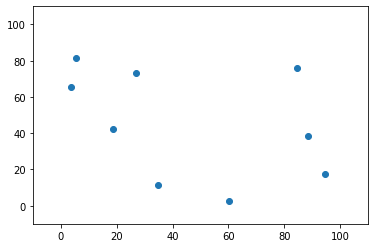

In [6]:
plt.scatter(cities_location[:, 0], cities_location[:, 1])
plt.xlim(-dist_max*0.1, dist_max*1.1)
plt.ylim(-dist_max*0.1, dist_max*1.1)
plt.show()

In [7]:
list(node_names)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

In [8]:
cities = []

comb_of_travels = []

for i in range(num_cities):
    cities.append(i)
perm = itertools.permutations(cities) 
  
for i in list(perm): 
    comb_of_travels.append(i)

In [9]:
def cost_to_travel(cities, idx1, idx2):
    return math.sqrt(pow(cities[idx1,0]-cities[idx2,0], 2)+ pow(cities[idx1,1]-cities[idx2,1], 2))

In [10]:
cost_max = float("inf")

path_best_cost = []

step = 0

for each_travel in comb_of_travels:
    cost_for_this_travel = 0
    step = step + 1
    for j in range(-1, len(each_travel) - 1):
        cost_for_this_travel = cost_for_this_travel + cost_to_travel(cities_location, each_travel[j], each_travel[j+1])
#         print(cost_to_travel(cities_location, each_travel[j], each_travel[j+1]))
    if cost_for_this_travel < cost_max:
        cost_max = cost_for_this_travel
#         print("Candidate: ", each_travel, cost_max)
        path_best_cost = list(each_travel).copy()

In [11]:
path_best_cost

[1, 6, 0, 2, 3, 8, 5, 7, 4]

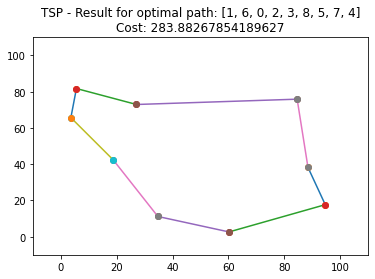

In [12]:
for i in range(-1, len(path_best_cost)-1):
    idx_from = path_best_cost[i]
    idx_to = path_best_cost[i+1]

    plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_to, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_to, 1]]))
    plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_to, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_to, 1]]), 'o')

plt.xlim(-dist_max*0.1, dist_max*1.1)
plt.ylim(-dist_max*0.1, dist_max*1.1)
plt.title("TSP - Result for optimal path: " + str(path_best_cost) + "\nCost: " + str(cost_max))
plt.show()

In [13]:
print("Program runned in", step, "steps and cost is",  cost_max)

Program runned in 362880 steps and cost is 283.88267854189627


In [14]:
cost_max = float("inf")

path_best_cost = []

step = 0

for each_travel in comb_of_travels:
    if(each_travel[0]!=0):
        continue
    cost_for_this_travel = 0
    step = step + 1
    for j in range(-1, len(each_travel) - 1):
        cost_for_this_travel = cost_for_this_travel + cost_to_travel(cities_location, each_travel[j], each_travel[j+1])
#         print(cost_to_travel(cities_location, each_travel[j], each_travel[j+1]))
    if cost_for_this_travel < cost_max:
        cost_max = cost_for_this_travel
#         print("Candidate: ", each_travel, cost_max)
        path_best_cost = list(each_travel).copy()

In [15]:
cities = []

comb_of_travels = []

for i in range(1, num_cities):
    cities.append(i)
perm = itertools.permutations(cities) 
  
for i in list(perm): 
    comb_of_travels.append([0] + list(i))

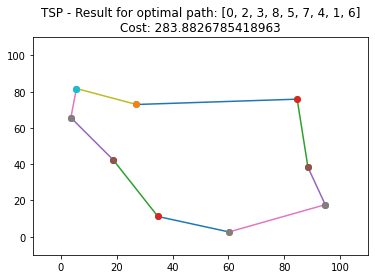

In [16]:
for i in range(-1, len(path_best_cost)-1):
    idx_from = path_best_cost[i]
    idx_to = path_best_cost[i+1]

    plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_to, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_to, 1]]))
    plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_to, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_to, 1]]), 'o')

plt.xlim(-dist_max*0.1, dist_max*1.1)
plt.ylim(-dist_max*0.1, dist_max*1.1)
plt.title("TSP - Result for optimal path: " + str(path_best_cost) + "\nCost: " + str(cost_max))
plt.show()

In [17]:
print("Program runned in", step, "steps and cost is",  cost_max)

Program runned in 40320 steps and cost is 283.8826785418963


In [19]:
path_best_cost

[0, 2, 3, 8, 5, 7, 4, 1, 6]